In [ ]:
import tensorflow as tf

from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

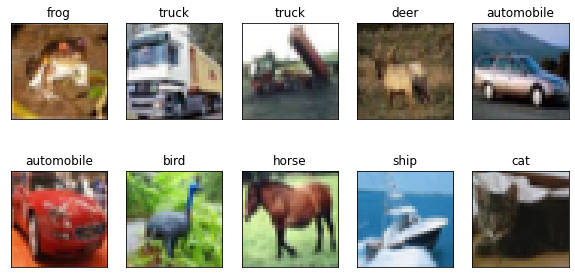

In [ ]:
plt.figure(figsize=(10, 5))

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(train_images[i])
  plt.title(class_names[(train_labels[i][0])])
  plt.xticks([])
  plt.yticks([])
  
plt.show()

In [ ]:
print("train_images", train_images.shape)
print("test_images", test_images.shape)

train_images (50000, 32, 32, 3)
test_images (10000, 32, 32, 3)


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train = train_images.reshape(50000, 32 * 32 * 3)
X_test = test_images.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(train_labels, 10)
Y_test = np_utils.to_categorical(test_labels, 10)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

(40000, 3072)
(40000, 10)
(10000, 3072)
(10000, 10)
(10000, 3072)
(10000, 10)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


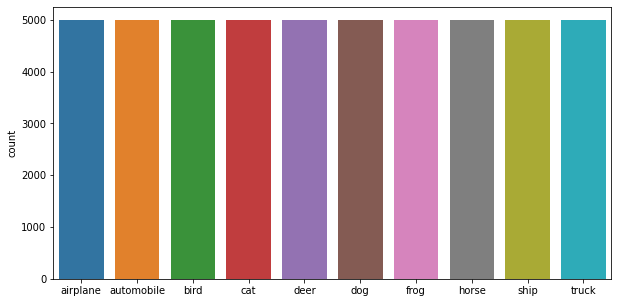

In [ ]:
name_id_map = dict(zip(range(len(class_names)), class_names))

import seaborn as sns
# visualize the target variable
plt.figure(figsize = (10, 5))
g = sns.countplot(train_labels.reshape(50000, ))
g.set_xticklabels(class_names)
plt.show()

In [ ]:
sum(test_labels == 0)

array([1000])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [ ]:
def getModel(activationFcn = 'relu', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)):
  model = Sequential()
  model.add(Dense(1024, activation=activationFcn, input_dim=3072))
  model.add(Dense(512, activation=activationFcn))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer=optimizerFcn,
                loss=LossFcn,
                metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
#  from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier

# model = KerasClassifier(build_fn=getModel, verbose=0)

# init = ['glorot_uniform', 'normal', 'uniform']
# epochs = np.array([50, 100, 150])
# batches = np.array([32, 64, 256])
# lr = np.array([0.1, 0.01, 0.001])
# param_grid = dict(nb_epoch=epochs, batch_size=batches, init=init, lr = lr)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy")
# grid_result = grid.fit(X_train, Y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# for params, mean_score, scores in grid_result.grid_scores_:
#     print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

def LossAccPlot(history):
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  plt.figure()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

def confMatPlot(X_test, Y_test, class_names):
  Y_predicted = model.predict(X_test)
  y_pred = np.argmax(Y_predicted, axis=1)
  y_test2 = np.argmax(Y_test, axis=1)
  cm = confusion_matrix(y_test2, y_pred)
  cm_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
  con_mat_df = pd.DataFrame(cm_norm,index = class_names, columns = class_names)

  plt.figure(figsize=(10, 10))
  sns.heatmap(con_mat_df, annot=True)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title('Test data confusion matrix')
  plt.show()

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor= 'val_loss',patience=30,restore_best_weights=True
)

model = getModel(activationFcn = 'relu', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

history = model.fit(X_train,Y_train, epochs=300, batch_size=512, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
79/79 [==============================] - 4s 30ms/step - loss: 1.9247 - accuracy: 0.3167 - val_loss: 1.8252 - val_accuracy: 0.3317
Epoch 2/300
79/79 [==============================] - 2s 20ms/step - loss: 1.7230 - accuracy: 0.3971 - val_loss: 1.7888 - val_accuracy: 0.3517
Epoch 3/300
79/79 [==

Test loss: 1.3550320863723755
Test acc: 0.5284000039100647


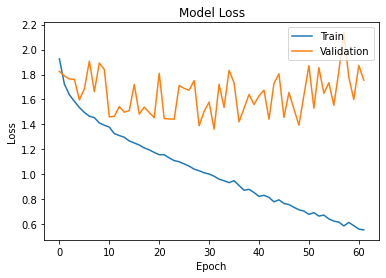

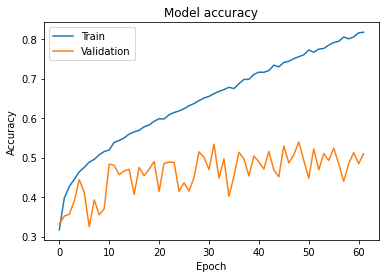

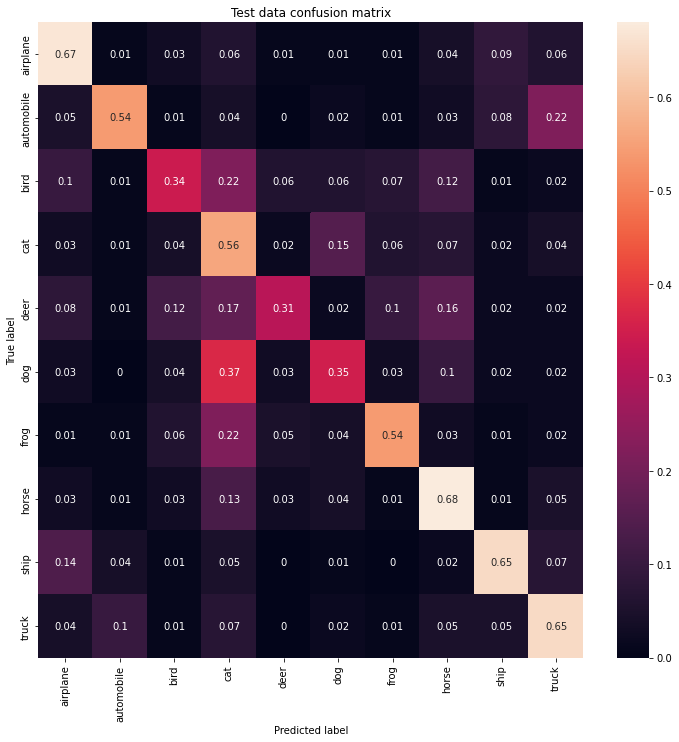

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, batch_size=512, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history)
confMatPlot(X_test, Y_test, class_names)

# `A) For batch_size = [32, 64, 256]`

### Batch Size = 32

Test loss: 1.3836716413497925
Test acc: 0.5109999775886536


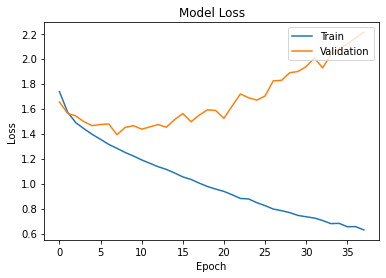

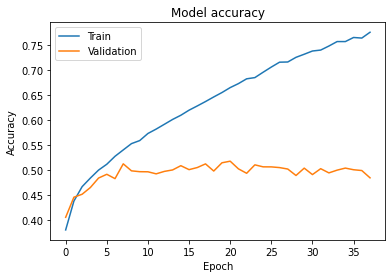

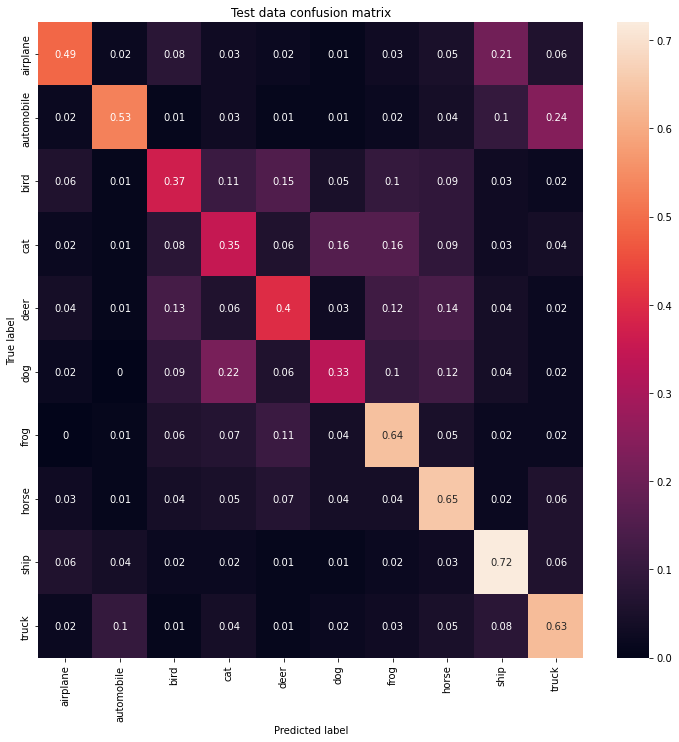

In [ ]:
batchSize = 32
historyA32 = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(historyA32)
confMatPlot(X_test, Y_test, class_names)

Test loss: 1.358507752418518
Test acc: 0.532800018787384


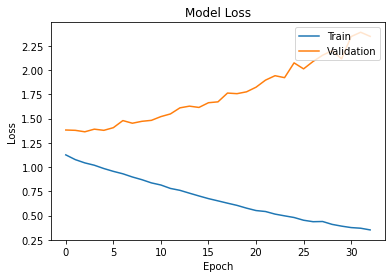

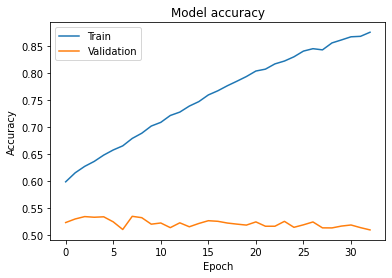

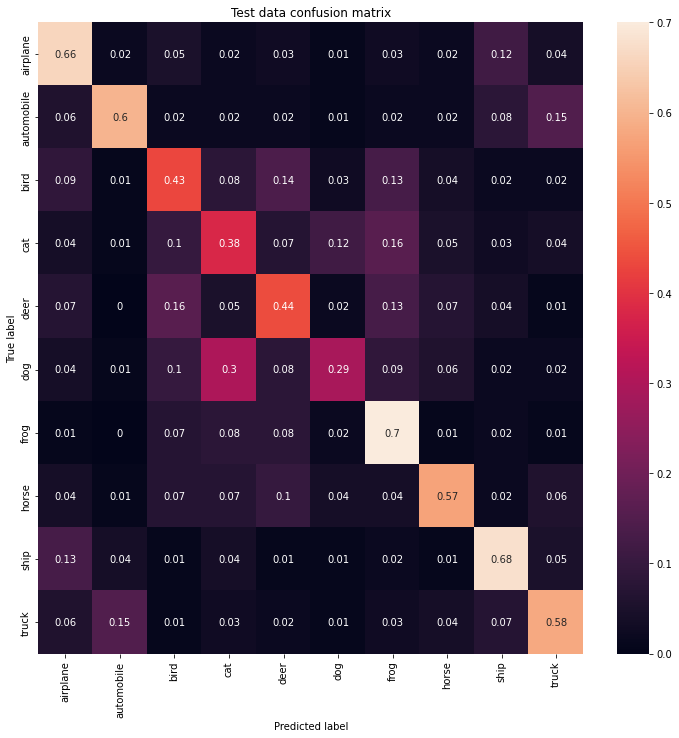

In [ ]:
batchSize = 64
historyA64 = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(historyA64)
confMatPlot(X_test, Y_test, class_names)

Test loss: 1.3162413835525513
Test acc: 0.5496000051498413


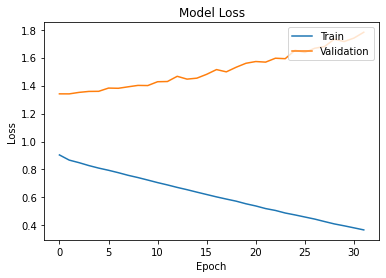

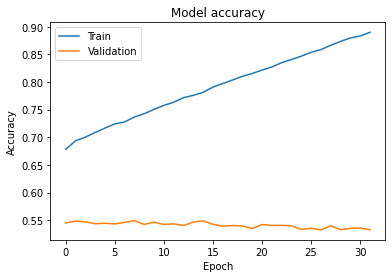

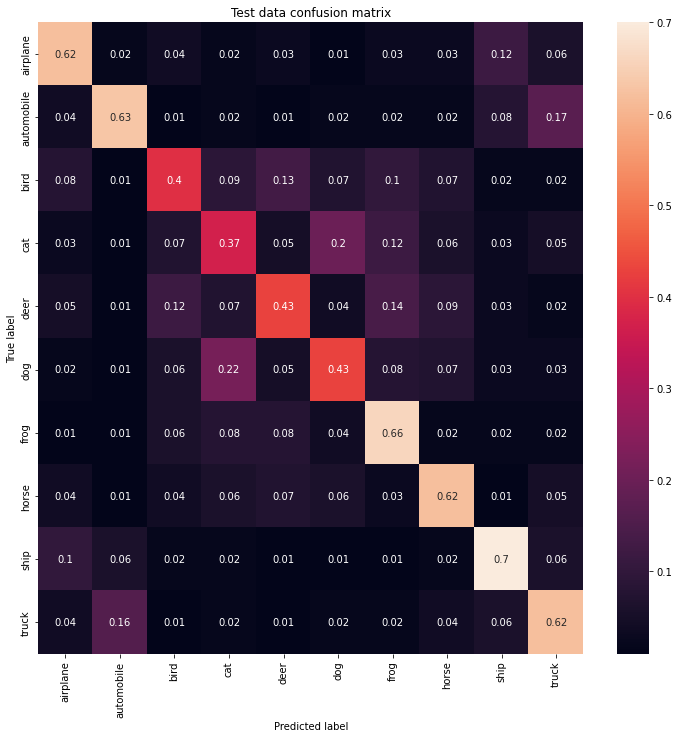

In [ ]:
batchSize = 256
history256 = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history256)
confMatPlot(X_test, Y_test, class_names)

# `B) Activation Function = ['relu', 'tanh']`

### Activation Function = 'relu'

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Test loss: 1.4053882360458374
Test acc: 0.5234000086784363


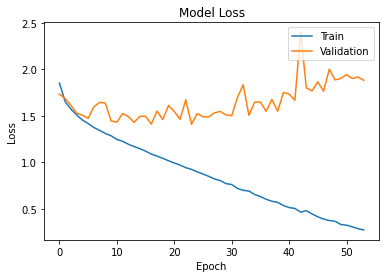

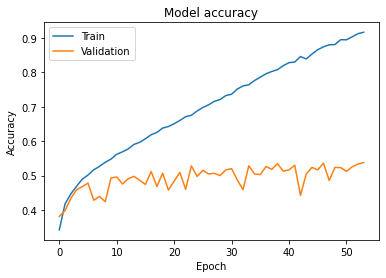

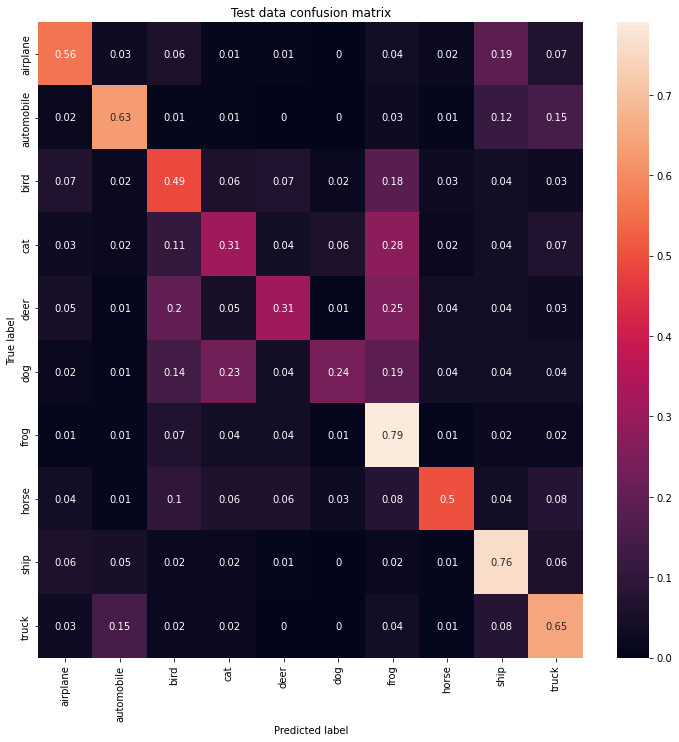

In [ ]:
batchSize = 256

model = getModel(activationFcn = 'relu', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

historyrelu = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(historyrelu)
confMatPlot(X_test, Y_test, class_names)

### Activation Function = 'tanh'

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Test loss: 1.3288378715515137
Test acc: 0.5327000021934509


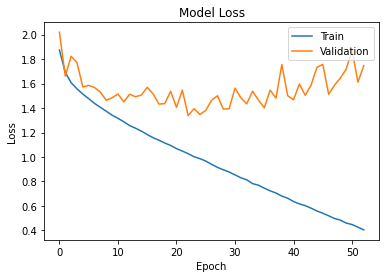

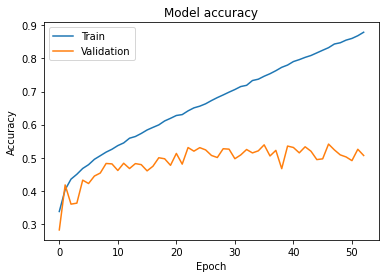

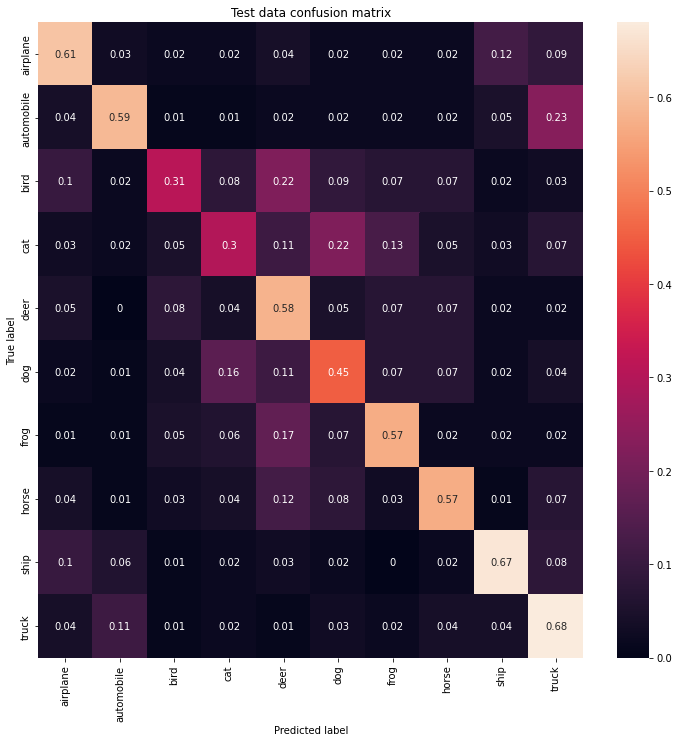

In [ ]:
batchSize = 256

model = getModel(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

historyrelu = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(historyrelu)
confMatPlot(X_test, Y_test, class_names)

# C) Loss Function = ['categorical_crossentropy', 'MSE']


### Loss Function = 'categorical_crossentropy'



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Test loss: 1.3633496761322021
Test acc: 0.5206999778747559


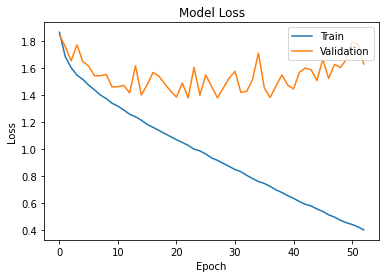

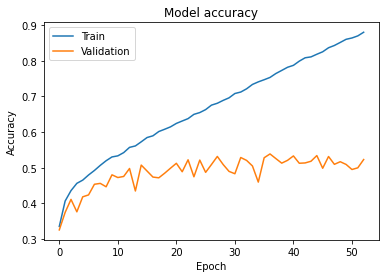

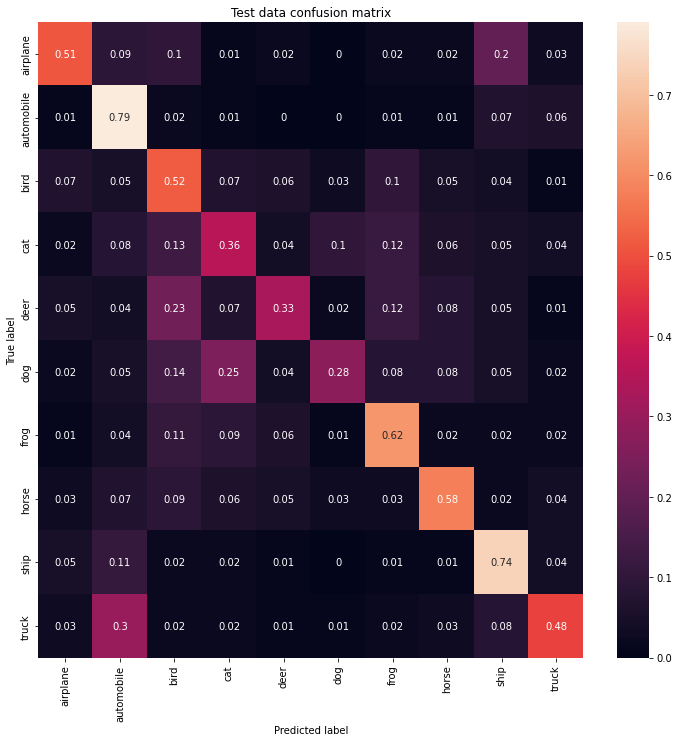

In [ ]:
batchSize = 256

model = getModel(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

historyrelu = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(historyrelu)
confMatPlot(X_test, Y_test, class_names)

### Loss Function = 'MSE'



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Test loss: 0.06429703533649445
Test acc: 0.5005000233650208


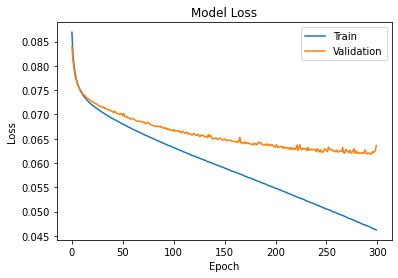

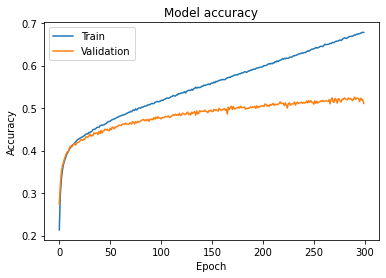

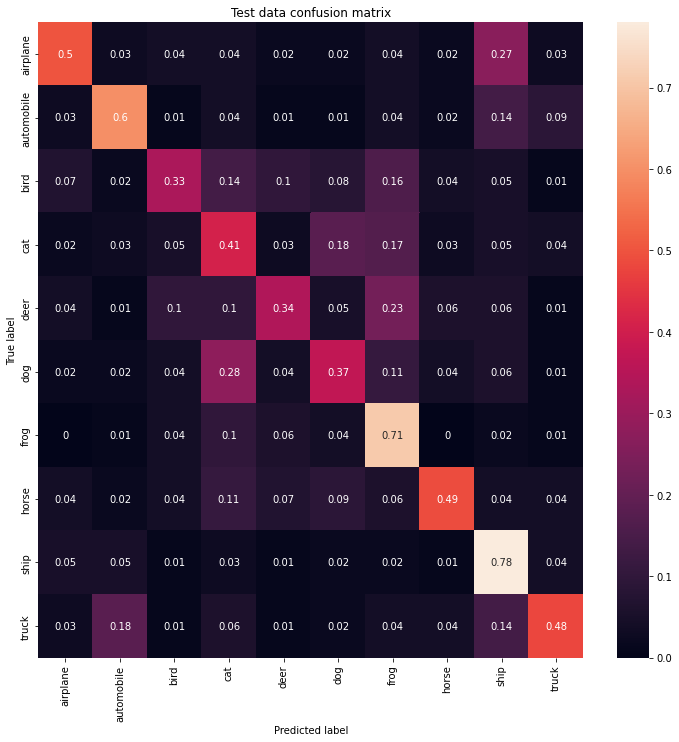

In [ ]:
batchSize = 256

model = getModel(activationFcn = 'tanh', LossFcn = 'MSE', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

historyrelu = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(historyrelu)
confMatPlot(X_test, Y_test, class_names)

# D) Optimizer = ['SGD + momentum', 'Adam']

Optimizer = ['SGD + momentum']

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Test loss: 1.3868677616119385
Test acc: 0.5073000192642212


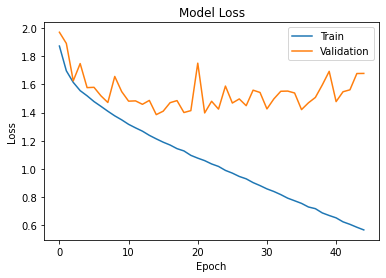

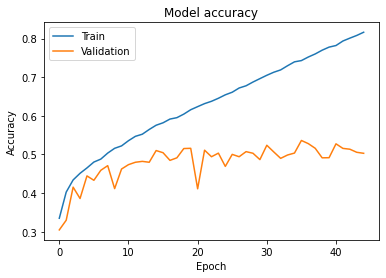

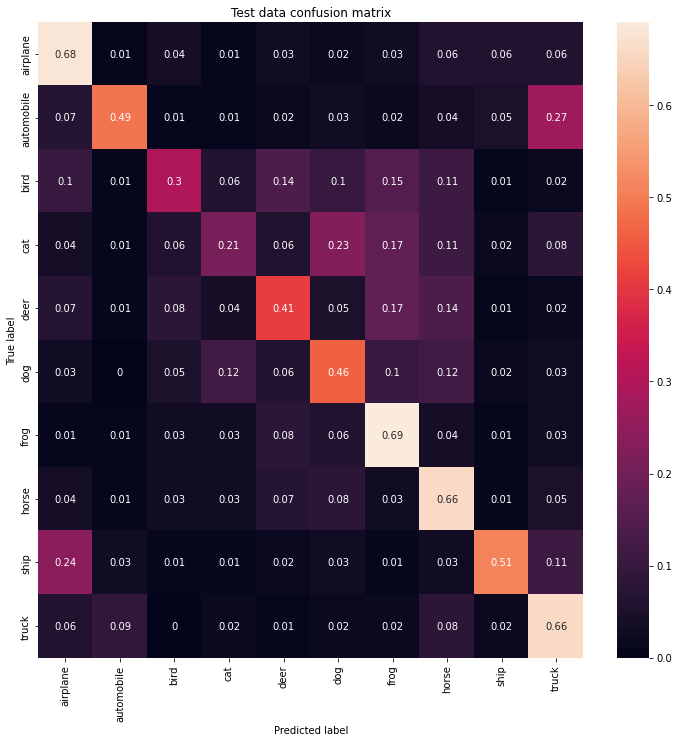

In [ ]:
batchSize = 256

model = getModel(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

historyrelu = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(historyrelu)
confMatPlot(X_test, Y_test, class_names)

Optimizer = ['Adam']

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Test loss: 1.4891786575317383
Test acc: 0.47760000824928284


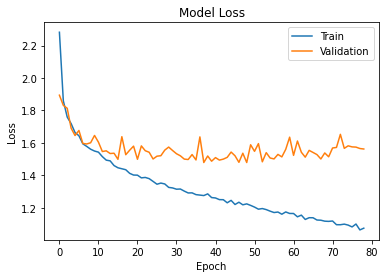

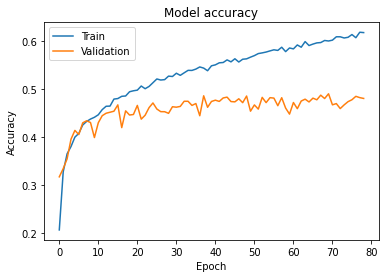

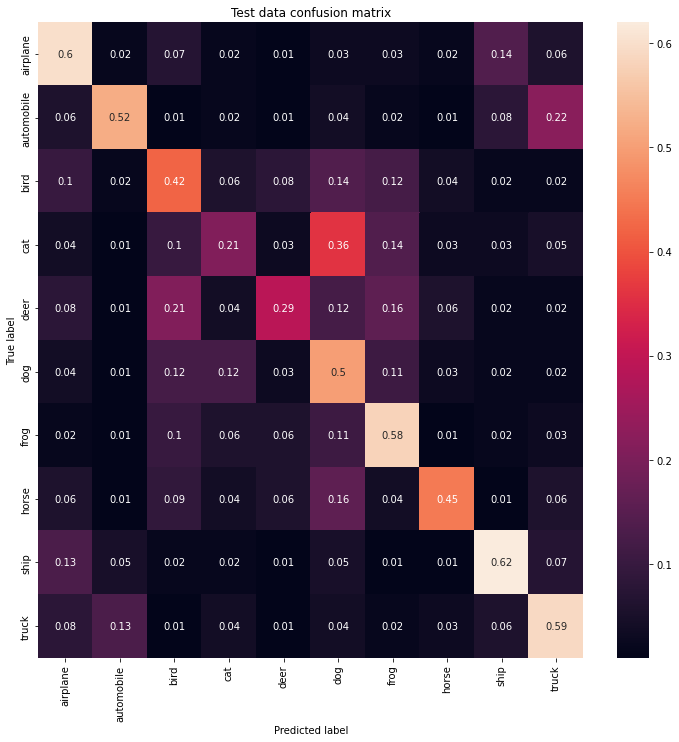

In [ ]:
batchSize = 256

model = getModel(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = tf.keras.optimizers.Adam(learning_rate=0.001))

historyrelu = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(historyrelu)
confMatPlot(X_test, Y_test, class_names)

## E) Other metrics

In [ ]:
from sklearn.metrics import classification_report

batchSize = 256

model = getModel(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

historyrelu = model.fit(X_train,Y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Y_predicted = np.argmax(model.predict(X_test), axis=1)
y_test2 = np.argmax(Y_test, axis=1)
print(classification_report(y_test2, Y_predicted, target_names=class_names))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dense_23 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Test loss: 1.3388192653656006
Test acc: 0.531499981880188
              precision    recall  f1-score   support

    airplane       0.68      0.52      0.59      1000
  automobile       0.66      0.65      0.65      1000
        bird       0.39      0.45      0.42      1000
         cat       0.39     

# F) Handling Imbalanced Dataset

Make the dataset imbalanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


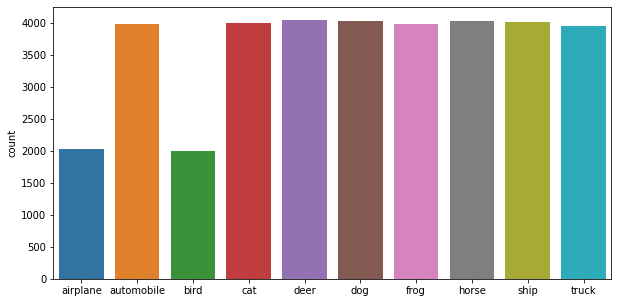

In [ ]:
from sklearn.utils import class_weight
import random

x_train = np.copy(X_train)
y_train = np.copy(Y_train)

y_train2 = np.argmax(Y_train, axis=1)
Idx = np.where(y_train2==0)[0]
Idx_del = np.random.permutation(Idx)[0:sum(y_train2 == 0)//2]
x_train = np.delete(x_train, Idx_del, axis=0)
y_train = np.delete(y_train, Idx_del, axis=0)

y_train2 = np.argmax(y_train, axis=1)
Idx = np.where(y_train2==2)[0]
Idx_del = np.random.permutation(Idx)[0:sum(y_train2 == 2)//2]
x_train = np.delete(x_train, Idx_del, axis=0)
y_train = np.delete(y_train, Idx_del, axis=0)

# visualize the target variable
y_train2 = np.argmax(y_train, axis=1)
plt.figure(figsize = (10, 5))
g = sns.countplot(y_train2.reshape(y_train2.shape[0]))
g.set_xticklabels(class_names)
plt.show()

Train and evaluate the model with unbalanced dataset

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dense_26 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Test loss: 1.3640964031219482
Test acc: 0.5274999737739563


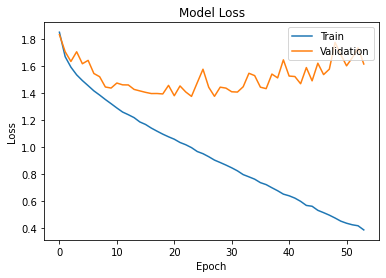

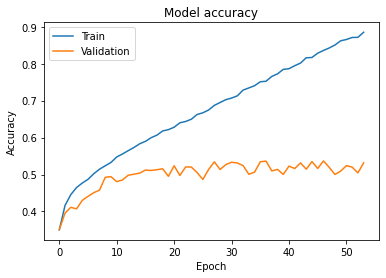

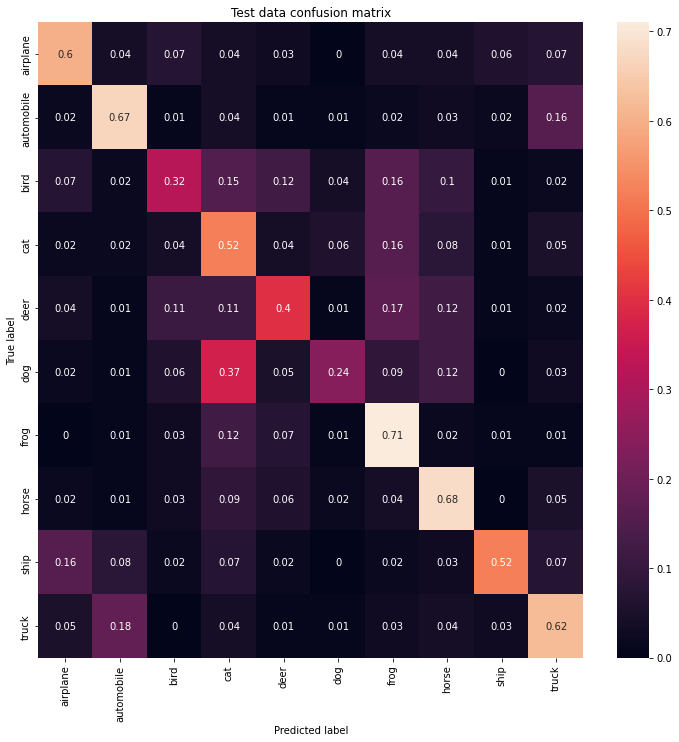

              precision    recall  f1-score   support

    airplane       0.59      0.60      0.59      1000
  automobile       0.64      0.67      0.65      1000
        bird       0.47      0.32      0.38      1000
         cat       0.33      0.52      0.41      1000
        deer       0.49      0.40      0.44      1000
         dog       0.58      0.24      0.34      1000
        frog       0.50      0.71      0.59      1000
       horse       0.54      0.68      0.60      1000
        ship       0.77      0.53      0.62      1000
       truck       0.55      0.61      0.58      1000

    accuracy                           0.53     10000
   macro avg       0.55      0.53      0.52     10000
weighted avg       0.55      0.53      0.52     10000



In [ ]:
batchSize = 256

model = getModel(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

history = model.fit(x_train,y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history)
confMatPlot(X_test, Y_test, class_names)

Y_predicted = np.argmax(model.predict(X_test), axis=1)
y_test2 = np.argmax(Y_test, axis=1)
print(classification_report(y_test2, Y_predicted, target_names=class_names))

Train and evaluate the model with unbalanced dataset by changing the class weights

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_28 (Dense)            (None, 512)               524800    
                                                                 
 dense_29 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
None
Test loss: 1.3642669916152954
Test acc: 0.5282999873161316


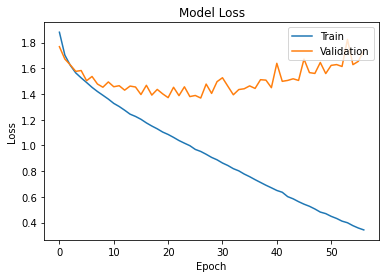

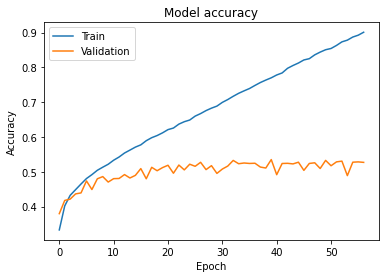

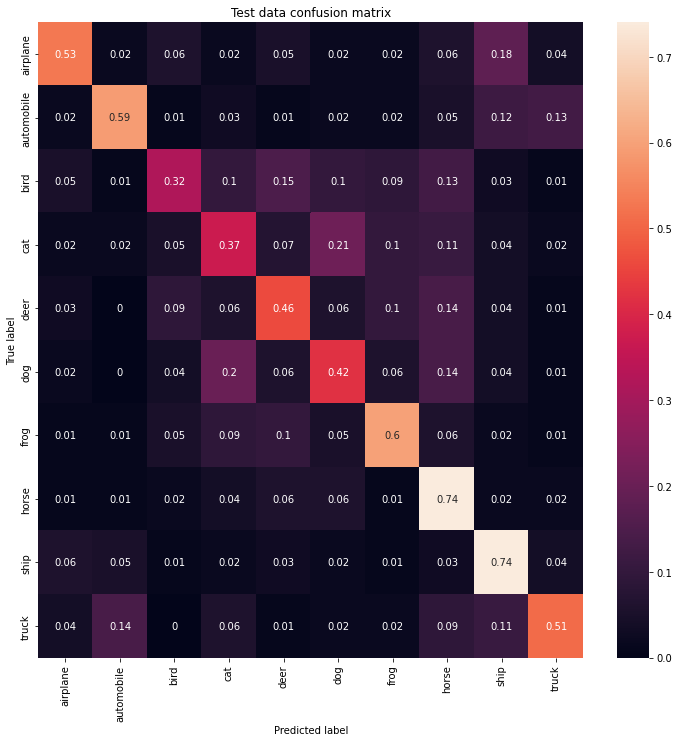

              precision    recall  f1-score   support

    airplane       0.67      0.53      0.59      1000
  automobile       0.69      0.59      0.64      1000
        bird       0.49      0.32      0.39      1000
         cat       0.37      0.37      0.37      1000
        deer       0.46      0.46      0.46      1000
         dog       0.43      0.42      0.42      1000
        frog       0.58      0.60      0.59      1000
       horse       0.48      0.74      0.58      1000
        ship       0.55      0.74      0.63      1000
       truck       0.64      0.51      0.57      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.52     10000
weighted avg       0.54      0.53      0.52     10000



In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight = 'balanced',
    classes = np.unique(y_train2),
    y = y_train2
)
class_weights = dict(enumerate(class_weights))

batchSize = 256

model = getModel(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

historyClassWeights = model.fit(x_train,y_train, epochs=300, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=0, class_weight=class_weights)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(historyClassWeights)
confMatPlot(X_test, Y_test, class_names)

Y_predicted = np.argmax(model.predict(X_test), axis=1)
y_test2 = np.argmax(Y_test, axis=1)
print(classification_report(y_test2, Y_predicted, target_names=class_names))

## CNN

A) Add ConvLayers

In [ ]:
def getCNN1(activationFcn = 'relu', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)):

  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(Flatten())
  model.add(Dense(1024, activation=activationFcn))
  model.add(Dense(512, activation=activationFcn))
  model.add(Dense(10, activation='softmax'))

  # Checking the model summary
  model.summary()

  model.compile(optimizer=optimizerFcn,
                loss=LossFcn,
                metrics=['accuracy'])
  print(model.summary())
  return model

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense_30 (Dense)            (None, 1024)              134218752 
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 dense_32 (Dense)            (None, 10)              

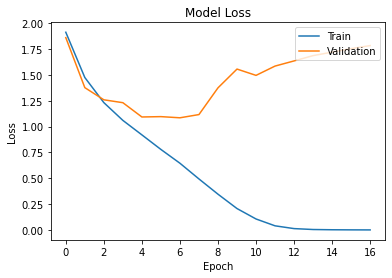

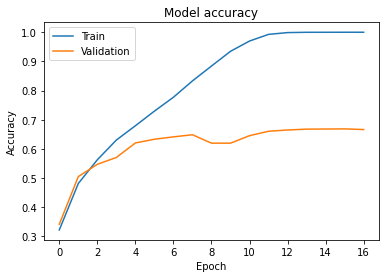

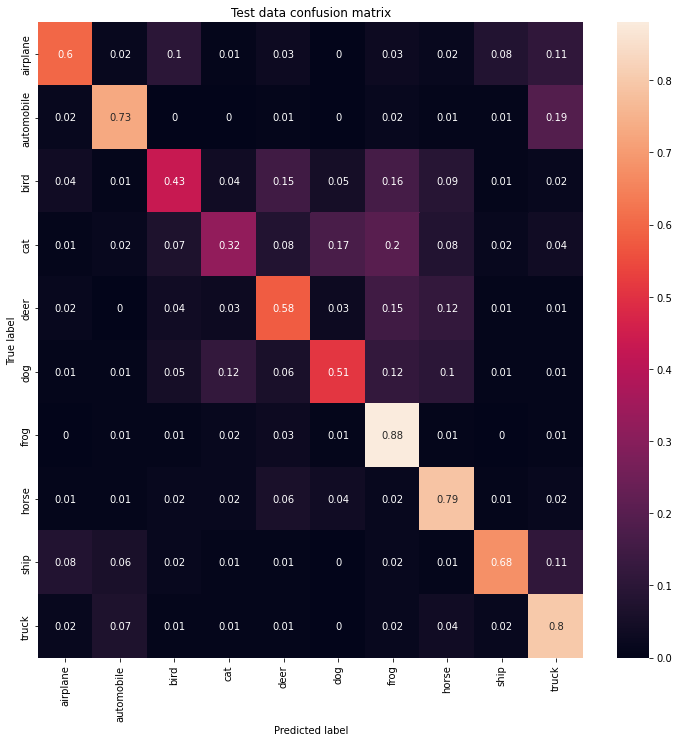

              precision    recall  f1-score   support

    airplane       0.74      0.60      0.66      1000
  automobile       0.78      0.73      0.75      1000
        bird       0.56      0.43      0.49      1000
         cat       0.55      0.32      0.40      1000
        deer       0.57      0.58      0.58      1000
         dog       0.62      0.51      0.56      1000
        frog       0.54      0.88      0.67      1000
       horse       0.62      0.79      0.70      1000
        ship       0.80      0.68      0.74      1000
       truck       0.61      0.80      0.69      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.62     10000
weighted avg       0.64      0.63      0.62     10000



In [ ]:
X_train = train_images.astype('float32')
X_test = test_images.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(train_labels, 10)
Y_test = np_utils.to_categorical(test_labels, 10)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)

callback = keras.callbacks.EarlyStopping(
    monitor= 'val_loss', patience=10, restore_best_weights=True
)

batchSize = 256

model = getCNN1(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

history = model.fit(X_train,Y_train, epochs=100, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=1)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history)
confMatPlot(X_test, Y_test, class_names)

Y_predicted = np.argmax(model.predict(X_test), axis=1)
y_test2 = np.argmax(Y_test, axis=1)
print(classification_report(y_test2, Y_predicted, target_names=class_names))

B) Add batch normalization and pooling

In [ ]:
def getCNN2(activationFcn = 'relu', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)):

  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Flatten())
  model.add(Dense(1024, activation=activationFcn))
  model.add(BatchNormalization())
  model.add(Dense(512, activation=activationFcn))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))

  # Checking the model summary
  model.summary()

  model.compile(optimizer=optimizerFcn,
                loss=LossFcn,
                metrics=['accuracy'])
  print(model.summary())
  return model

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                     

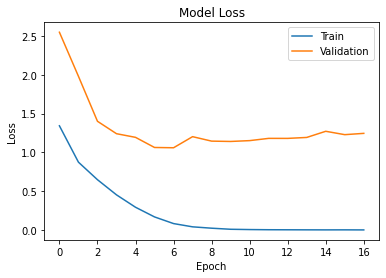

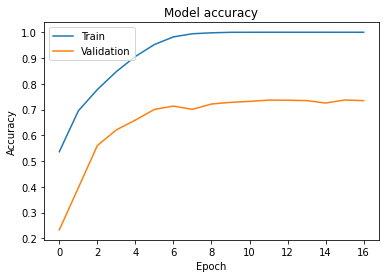

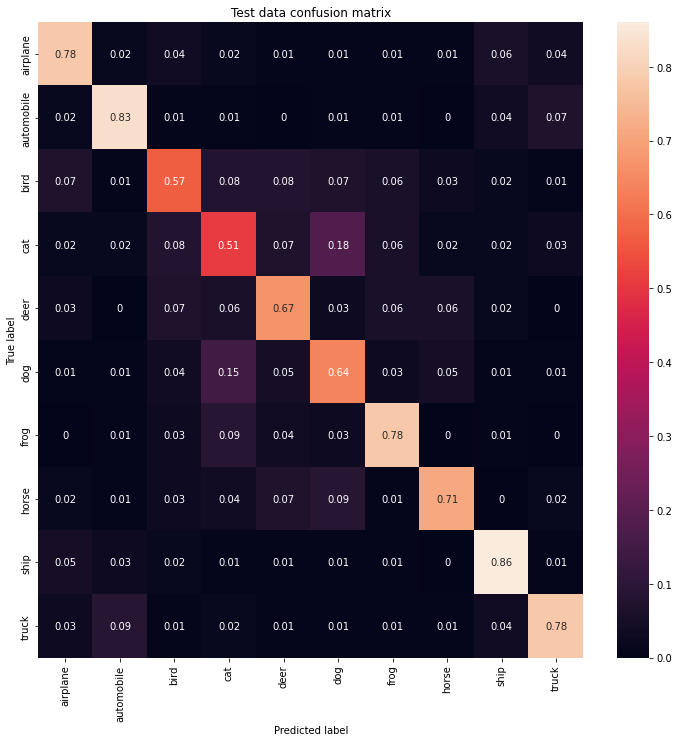

              precision    recall  f1-score   support

    airplane       0.75      0.78      0.77      1000
  automobile       0.82      0.83      0.82      1000
        bird       0.63      0.57      0.60      1000
         cat       0.51      0.51      0.51      1000
        deer       0.66      0.67      0.67      1000
         dog       0.59      0.64      0.61      1000
        frog       0.76      0.78      0.77      1000
       horse       0.79      0.71      0.75      1000
        ship       0.80      0.86      0.82      1000
       truck       0.81      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [ ]:
batchSize = 256

model = getCNN2(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

history = model.fit(X_train,Y_train, epochs=100, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=1)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history)
confMatPlot(X_test, Y_test, class_names)

Y_predicted = np.argmax(model.predict(X_test), axis=1)
y_test2 = np.argmax(Y_test, axis=1)
print(classification_report(y_test2, Y_predicted, target_names=class_names))

C) Add Dropout

In [ ]:
def getCNN3(activationFcn = 'relu', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)):

  model = Sequential()

  model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(512, activation=activationFcn))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(256, activation=activationFcn))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  # Checking the model summary
  model.summary()

  model.compile(optimizer=optimizerFcn,
                loss=LossFcn,
                metrics=['accuracy'])
  print(model.summary())
  return model

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                     

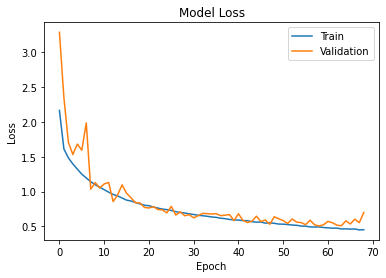

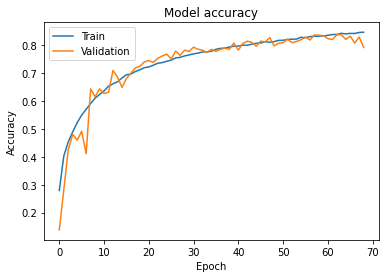

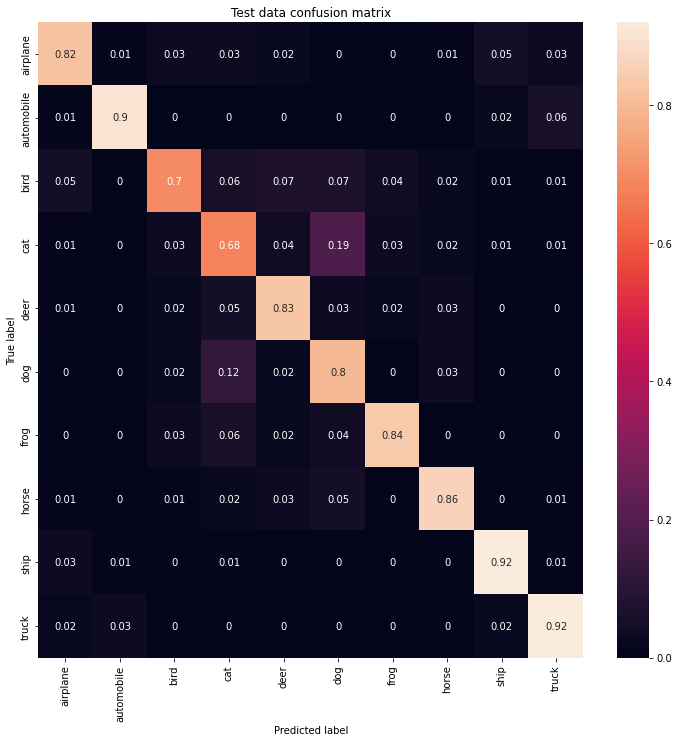

              precision    recall  f1-score   support

    airplane       0.86      0.82      0.84      1000
  automobile       0.94      0.90      0.92      1000
        bird       0.83      0.69      0.76      1000
         cat       0.66      0.68      0.67      1000
        deer       0.80      0.83      0.82      1000
         dog       0.67      0.80      0.73      1000
        frog       0.90      0.84      0.87      1000
       horse       0.89      0.86      0.88      1000
        ship       0.90      0.93      0.91      1000
       truck       0.87      0.92      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [ ]:
batchSize = 256

model = getCNN3(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

history = model.fit(X_train,Y_train, epochs=100, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=1)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history)
confMatPlot(X_test, Y_test, class_names)

Y_predicted = np.argmax(model.predict(X_test), axis=1)
y_test2 = np.argmax(Y_test, axis=1)
print(classification_report(y_test2, Y_predicted, target_names=class_names))

## Question 2 - Data Augmentation

Test Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive
%cd MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive


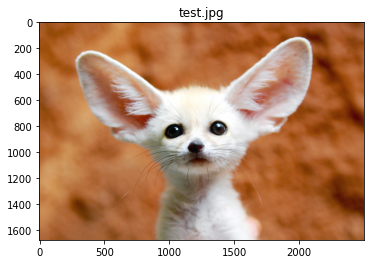

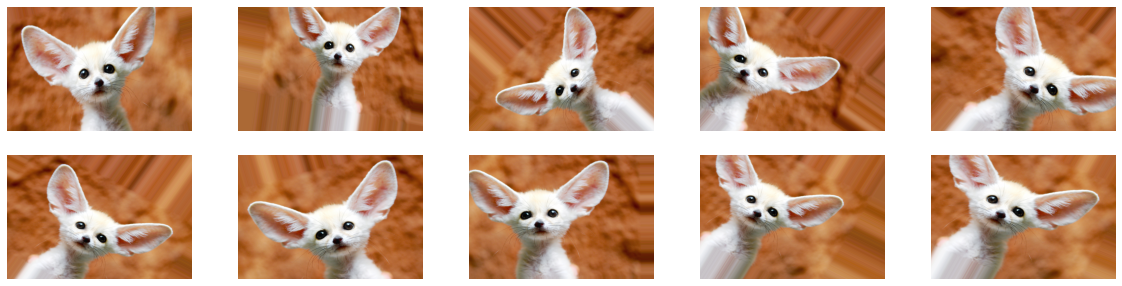

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
 
image = load_img('test.jpg')
plt.imshow(image)
plt.title('test.jpg')

image = img_to_array(image)/255
image_org = np.expand_dims(image, axis=0)

aug = ImageDataGenerator(
	rotation_range=60,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest"
    )

# generate samples and plot
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,5))

for i in range(2):
  for j in range(5):
    aug_iter = aug.flow(image_org, batch_size=1)
    image = next(aug_iter)[0]
    # plot image
    ax[i, j].imshow(image)
    ax[i, j].axis('off')



Cifar - Cat and Dog 90% removal

(41000, 32, 32, 3)
(41000, 10)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


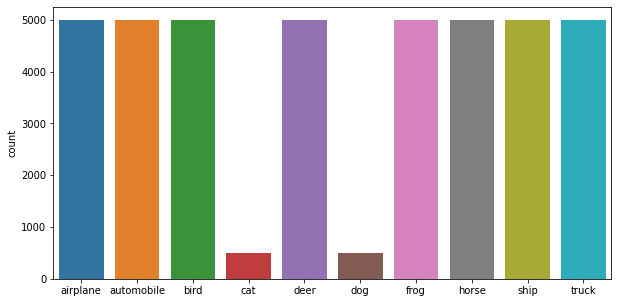

In [ ]:
from sklearn.utils import class_weight
import random

X_train = train_images.astype('float32')
X_test = test_images.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(train_labels, 10)
Y_test = np_utils.to_categorical(test_labels, 10)

x_train = np.copy(X_train)
y_train = np.copy(Y_train)

y_train2 = np.argmax(Y_train, axis=1)
Idx = np.where(y_train2==3)[0]
Idx_del = np.random.permutation(Idx)[0:int(np.floor(sum(y_train2 == 3)*0.9))]
x_train = np.delete(x_train, Idx_del, axis=0)
y_train = np.delete(y_train, Idx_del, axis=0)

y_train2 = np.argmax(y_train, axis=1)
Idx = np.where(y_train2==5)[0]
Idx_del = np.random.permutation(Idx)[0:int(np.floor(sum(y_train2 == 5)*0.9))]
x_train = np.delete(x_train, Idx_del, axis=0)
y_train = np.delete(y_train, Idx_del, axis=0)

print(x_train.shape)
print(y_train.shape)

# visualize the target variable
y_train2 = np.argmax(y_train, axis=1)
plt.figure(figsize = (10, 5))
g = sns.countplot(y_train2.reshape(y_train2.shape[0]))
g.set_xticklabels(class_names)
plt.show()

X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

Test loss: 0.7797325253486633
Test acc: 0.781000018119812


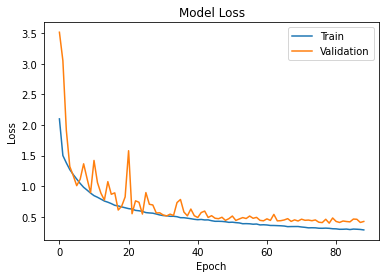

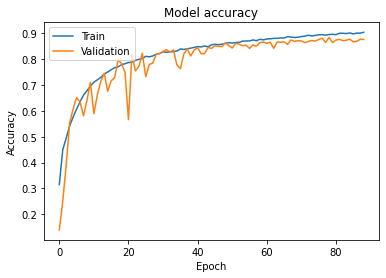

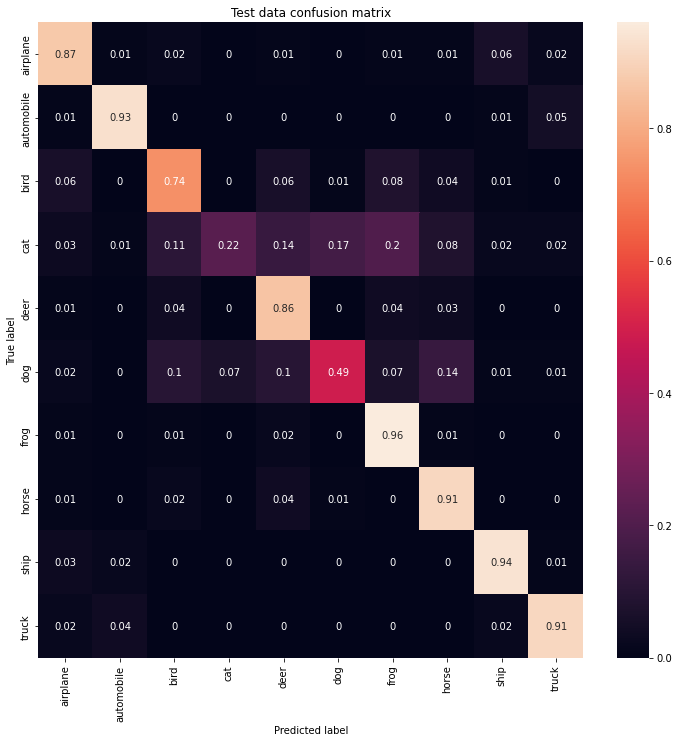

              precision    recall  f1-score   support

    airplane       0.82      0.87      0.84      1000
  automobile       0.92      0.93      0.92      1000
        bird       0.71      0.74      0.72      1000
         cat       0.73      0.21      0.33      1000
        deer       0.70      0.86      0.77      1000
         dog       0.71      0.49      0.58      1000
        frog       0.70      0.95      0.81      1000
       horse       0.74      0.91      0.82      1000
        ship       0.88      0.94      0.90      1000
       truck       0.89      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.76     10000
weighted avg       0.78      0.78      0.76     10000



In [ ]:
batchSize = 256

model = getCNN3(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

history = model.fit(X_train,Y_train, epochs=100, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=1)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history)
confMatPlot(X_test, Y_test, class_names)

Y_predicted = np.argmax(model.predict(X_test), axis=1)
y_test2 = np.argmax(Y_test, axis=1)
print(classification_report(y_test2, Y_predicted, target_names=class_names))

Data Augmentation for our data

In [ ]:
y_train2 = np.argmax(y_train, axis=1)
Idx_cat = np.where(y_train2==3)[0]
Idx_dog = np.where(y_train2==5)[0]

print(Idx_dog.shape)
print(Idx_cat.shape)

(500,)
(500,)


In [ ]:
x_cat = x_train[Idx_cat]
y_cat = y_train2[Idx_cat]
x_dog = x_train[Idx_dog]
y_dog = y_train2[Idx_dog]

print(x_cat.shape)
print(y_cat.shape)
print(x_dog.shape)
print(y_dog.shape)

(500, 32, 32, 3)
(500,)
(500, 32, 32, 3)
(500,)


In [ ]:
aug = ImageDataGenerator(
	rotation_range=60,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest"
    )

x_cat_new = []
x_dog_new = []

imgIter_cat = aug.flow(x_cat, batch_size=500)
imgIter_dog = aug.flow(x_dog, batch_size=500)

for i in range(9):
    ImgItr_x_cat = next(imgIter_cat)
    ImgItr_x_dog = next(imgIter_dog)

    x_cat_new.append(np.copy(ImgItr_x_cat))
    x_dog_new.append(np.copy(ImgItr_x_dog))

x_cat_new = np.concatenate(x_cat_new, axis = 0)
x_dog_new = np.concatenate(x_dog_new, axis = 0)

y_cat_new = 3*np.ones((4500,), dtype=int)
y_dog_new = 5*np.ones((4500,), dtype=int)

x_train_new = np.concatenate((x_train, x_cat_new, x_dog_new), axis=0)
y_train_new = np.concatenate((y_train2, y_cat_new, y_dog_new), axis=0)

y_train_new = np_utils.to_categorical(y_train_new, 10)

print(x_train_new.shape)
print(y_train_new.shape)

X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_new, y_train_new, test_size=0.2, shuffle=True)

(50000, 32, 32, 3)
(50000, 10)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                     

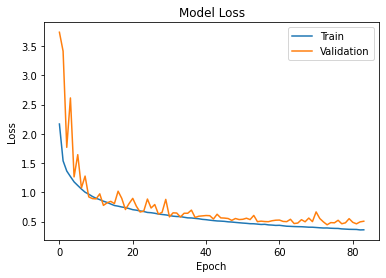

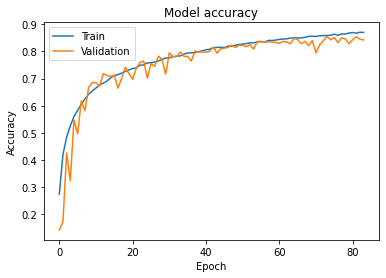

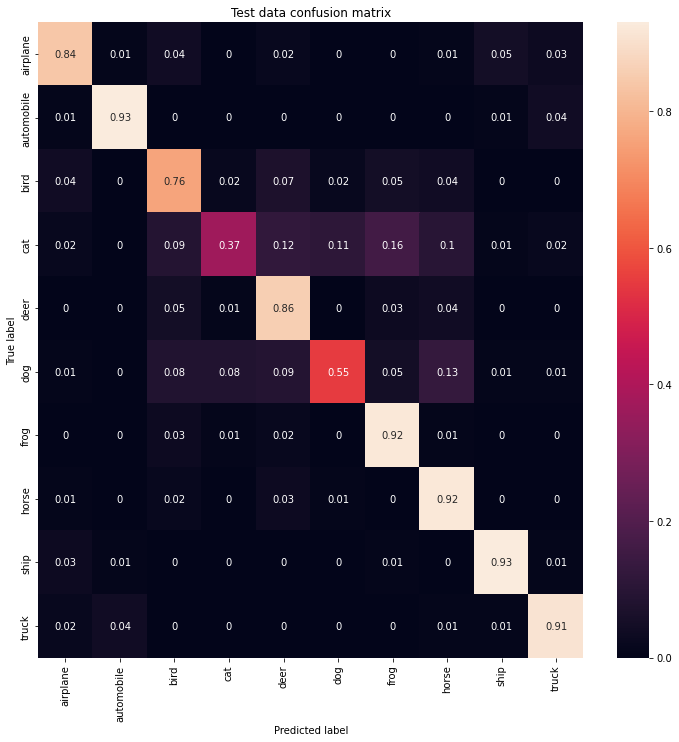

              precision    recall  f1-score   support

    airplane       0.85      0.84      0.85      1000
  automobile       0.93      0.93      0.93      1000
        bird       0.72      0.76      0.74      1000
         cat       0.75      0.37      0.49      1000
        deer       0.71      0.86      0.78      1000
         dog       0.77      0.55      0.64      1000
        frog       0.75      0.92      0.83      1000
       horse       0.73      0.92      0.82      1000
        ship       0.90      0.93      0.91      1000
       truck       0.90      0.91      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.79     10000
weighted avg       0.80      0.80      0.79     10000



In [ ]:
batchSize = 256

model = getCNN3(activationFcn = 'tanh', LossFcn = 'categorical_crossentropy', optimizerFcn = SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

history = model.fit(X_train,Y_train, epochs=100, batch_size=batchSize, validation_data = (X_valid, Y_valid), callbacks = [callback], verbose=1)

loss, acc = model.evaluate(X_test, Y_test, batch_size=batchSize, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history)
confMatPlot(X_test, Y_test, class_names)

Y_predicted = np.argmax(model.predict(X_test), axis=1)
y_test2 = np.argmax(Y_test, axis=1)
print(classification_report(y_test2, Y_predicted, target_names=class_names))